In [1]:
 import sys
 print(sys.executable)
 print(sys.version)
 print(sys.version_info)
# tested on aws lightsail instance 21 July 2020 using python38 kernel spec

/opt/jupyterhub/bin/python3
3.8.5 (default, Jan 27 2021, 15:41:15) 
[GCC 9.3.0]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


# Evaporation Trend Examination

### Background
Global warming is a currently popular and hotly (pun intended) debated issue. 
The usual evidence is temperature data presented as a time series with various temporal correlations to industrial activity and so forth. The increase in the global temperature is not disputed - what it means for society and how to respond is widely disputed.

One possible consequence of warming, regardless of the cause is an expectation that
<strong>evaportation rates would increase</strong> and temperate regions would experience more
drought and famine, and firm water yields would drop. 

However in a paper by Peterson and others (1995) the authors concluded from analysis of pan evaporation data in various parts of the world, that there has been a <strong>downward trend in evaporation</strong> at a significance level of 99%. 
Pan evaporation is driven as much by direct solar radiation (sun shining on water) as by surrounding air temperature.

Global dimming is defined as the decrease in the amounts of solar radiation reaching the surface of the Earth. The by-product of fossil fuels is tiny particles or pollutants which absorb solar energy and reflect back sunlight into space. This phenomenon was first recognized in the year 1950. Scientists believe that since 1950, the sun’s energy reaching Earth has dropped by 9% in Antarctica, 10% in the USA, 16% in parts of Europe and 30% in Russia – putting the overall average drop to be at an enormous 22%. This causes a high risk to our environment.

Aerosols have been found to be the major cause of global dimming. The burning of fossil fuels by industry and internal combustion engines emits by-products such as sulfur dioxide, soot, and ash. These together form particulate pollution—primarily called aerosols. Aerosols act as a precursor to global dimming in the following two ways:

These particle matters enter the atmosphere and directly absorb solar energy and reflect radiation back into space before it reaches the planet’s surface.
Water droplets containing these air-borne particles form polluted clouds. These polluted clouds have a heavier and larger number of droplets. These changed properties of the cloud – such clouds are called ‘brown clouds’ – makes them more reflective.
Vapors emitted from the planes flying high in the sky called contrails are another cause of heat reflection and related global dimming.

Both global dimming and global warming have been happening all over the world and together they have caused severe changes in the rainfall patterns. It is also believed that it was global dimming behind the 1984 Saharan drought that killed millions of people in sub-Saharan Africa. Scientists believe that despite the cooling effect created by global dimming, the earth’s temperature has increased by more than 1 deg. in the last century.

### References

Peterson, T.C., Golubev, V.S. and Groisman, P. Ya. 1995. Evaporation
losing its strength. Nature 377: 687-688.

https://www.conserve-energy-future.com/causes-and-effects-of-global-dimming.php

## Example Problem 
In Texas, evaporation rates (reported as inches per month) are available from the Texas Water Development Board.
https://waterdatafortexas.org/lake-evaporation-rainfall
The map below shows the quadrants (grid cells) for which data are tabulated.

![figure1](EvapMap.png)

Cell '911' is located between Corpus Christi and Houston in the Coastal Plains of Texas.  A copy of the dataset downloaded from the Texas Water Development Board is located at http://www.rtfmps.com/share_files/all_quads_gross_evaporation.csv

Using naive data science anlayze the data for Cell '911' and decide if the conclusions by Peterson and others (1995) are supported by this data.


### Exploratory Analysis
To analyze these data a first step is to obtain the data.  The knowlwdge that the data are arranged in a file with a ``.csv`` extension is a clue how to proceede.  We will need a module to interface with the remote server, in this example lets use something different than ``urllib``. Here we will use ``requests`` , so first we load the module

In [5]:
import requests # Module to process http/https requests
import pandas as pd

Now we will generate a ``GET`` request to the remote http server.  I chose to do so using a variable to store the remote URL so I can reuse code in future projects.  The ``GET`` request (an http/https method) is generated with the requests method ``get`` and assigned to an object named ``rget`` -- the name is arbitrary.  Next we extract the file from the ``rget`` object and write it to a local file with the name of the remote file - esentially automating the download process. Then we import the ``pandas`` module.

In [3]:
remote_url="http://atomickitty.ddns.net/documents/shared-databases/all_quads_gross_evaporation.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('all_quads_gross_evaporation.csv','wb').write(rget.content) # extract from the remote the contents, assign to a local file same name
import pandas as pd # Module to process dataframes (not absolutely needed but somewhat easier than using primatives, and gives graphing tools)

KeyboardInterrupt: 

Now we can read the file contents and check its structure, before proceeding.

In [6]:
evapdf = pd.read_csv("all_quads_gross_evaporation.csv",parse_dates=["YYYY-MM"]) # Read the file as a .CSV assign to a dataframe evapdf
evapdf.head() # check structure

,YYYY-MM,104,105,106,107,108,204,205,206,207,...,911,912,1008,1009,1010,1011,1108,1109,1110,1210
0,1954-01-01,1.80,1.80,2.02,2.24,2.24,2.34,1.89,1.80,1.99,...,1.42,1.30,2.50,2.42,1.94,1.29,2.59,2.49,2.22,2.27
1,1954-02-01,4.27,4.27,4.13,3.98,3.90,4.18,4.26,4.27,4.26,...,2.59,2.51,4.71,4.30,3.84,2.50,5.07,4.62,4.05,4.18
2,1954-03-01,4.98,4.98,4.62,4.25,4.20,5.01,4.98,4.98,4.68,...,3.21,3.21,6.21,6.06,5.02,3.21,6.32,6.20,5.68,5.70
3,1954-04-01,6.09,5.94,5.94,6.07,5.27,6.31,5.98,5.89,5.72,...,3.83,3.54,6.45,6.25,4.92,3.54,6.59,6.44,5.88,5.95
4,1954-05-01,5.41,5.09,5.14,4.40,3.61,5.57,4.56,4.47,4.18,...,3.48,3.97,7.92,8.13,6.31,3.99,7.75,7.98,7.40,7.40


Structure looks like a spreadsheet as expected; lets plot the time series for cell '911'

<AxesSubplot:xlabel='YYYY-MM'>

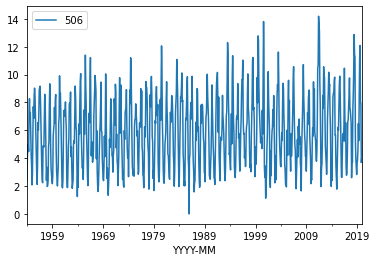

In [7]:
evapdf.plot.line(x='YYYY-MM',y='506') # Plot quadrant 911 evaporation time series 

Now we can see that the signal indeed looks like it is going up at its mean value then back down. Lets try a moving average over 12-month windows. The syntax is a bit weird, but it should dampen the high frequency (monthly) part of the signal.  Sure enough there is a downaward trend at about month 375, which we recover the date using the index -- in this case around 1985.


count    792.000000
mean       5.858346
std        2.562598
min        0.000000
25%        3.710000
50%        5.750000
75%        7.740000
max       14.190000
Name: 506, dtype: float64

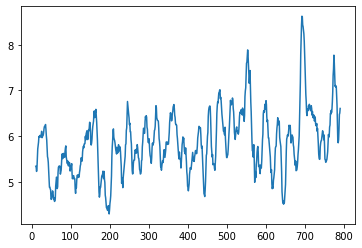

In [10]:
movingAvg=evapdf['506'].rolling(12, win_type ='boxcar').mean()
movingAvg
movingAvg.plot.line(x='YYYY-MM',y='506')
evapdf['YYYY-MM'][375]
evapdf['506'].describe()

So now lets split the dataframe at April 1985.  Here we will build two objects and can compare them.  Notice how we have split into two entire dataframes.

In [8]:
evB485loc = evapdf['YYYY-MM']<'1985-04'  # filter before 1985
evB485 = evapdf[evB485loc]
ev85uploc = evapdf['YYYY-MM']>='1985-04' # filter after 1985
ev85up= evapdf[ev85uploc]
print(evB485.head())
print(ev85up.head())

     YYYY-MM   104   105   106   107   108   204   205   206   207  ...   911  \
0 1954-01-01  1.80  1.80  2.02  2.24  2.24  2.34  1.89  1.80  1.99  ...  1.42   
1 1954-02-01  4.27  4.27  4.13  3.98  3.90  4.18  4.26  4.27  4.26  ...  2.59   
2 1954-03-01  4.98  4.98  4.62  4.25  4.20  5.01  4.98  4.98  4.68  ...  3.21   
3 1954-04-01  6.09  5.94  5.94  6.07  5.27  6.31  5.98  5.89  5.72  ...  3.83   
4 1954-05-01  5.41  5.09  5.14  4.40  3.61  5.57  4.56  4.47  4.18  ...  3.48   

    912  1008  1009  1010  1011  1108  1109  1110  1210  
0  1.30  2.50  2.42  1.94  1.29  2.59  2.49  2.22  2.27  
1  2.51  4.71  4.30  3.84  2.50  5.07  4.62  4.05  4.18  
2  3.21  6.21  6.06  5.02  3.21  6.32  6.20  5.68  5.70  
3  3.54  6.45  6.25  4.92  3.54  6.59  6.44  5.88  5.95  
4  3.97  7.92  8.13  6.31  3.99  7.75  7.98  7.40  7.40  

[5 rows x 93 columns]
       YYYY-MM   104    105    106   107   108   204    205    206   207  ...  \
375 1985-04-01  5.31   6.27   6.75  6.92  4.76  5.32   6.72  

Now lets get some simple descriptions of the two objects, and we will ignore thay they are time series.

In [9]:
evB485['911'].describe()

count    375.000000
mean       4.202480
std        1.774273
min        1.260000
25%        2.665000
50%        3.900000
75%        5.455000
max        8.800000
Name: 911, dtype: float64

In [21]:
ev85up['911'].describe()

count    417.000000
mean       4.167458
std        1.676704
min        1.230000
25%        2.680000
50%        4.160000
75%        5.410000
max        9.560000
Name: 911, dtype: float64

If we look at the means, the after 1985 is lower, and the SD about the same, so there is maybe support of the paper claims, but the median has increased while the IQR is practically unchanged.  We can produce boxplots from the two objects and see they are different, but not by much.  So the conclusion of the paper has support but its pretty weak and hardly statisticlly significant. 

<AxesSubplot:>

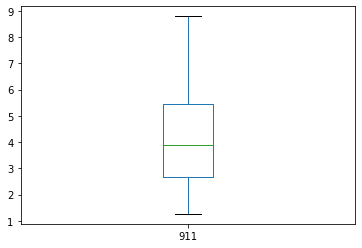

In [19]:
evB485['911'].plot.box()

<AxesSubplot:>

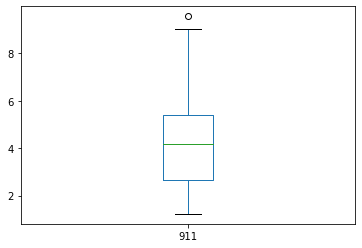

In [14]:
ev85up['911'].plot.box()

At this point, we would appeal to hypothesis testing or some other serious statistical analysis tools.  Lets try a favorite (of mine) non-paramatric test called the ``mannwhitneyu`` test.  

### Background
In statistics, the Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one population will be less than or greater than a randomly selected value from a second population.

This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

## Application
As usual we need to import necessary tools, in this case scipy.stats.  Based on the module name, it looks like a collection of methods (the dot ``.`` is the giveaway).  The test itself is applied to the two objects, if there is a statistical change in behavior we expect the two collections of records to be different.

In [20]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(evB485['911'],ev85up['911'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

statistic=78184.500, p-value at rejection =0.500
Probably the same distribution


If there were indeed a 99% significance level, the p-value should have been smaller than 0.05 (two-tailed) and the p-value was quite high.  I usually check that I wrote the script by testing he same distribution against itself, I should get a p-vale of 0.5.  Indeed that's the case.  

In [21]:
stat, p = mannwhitneyu(evB485['911'],evB485['911'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

statistic=70312.500, p-value at rejection =0.500
Probably the same distribution


Now lets repeat the analysis but break in 1992 when Clean Air Act rules were slightly relaxed:

In [22]:
evB492loc = evapdf['YYYY-MM']<'1992'  # filter before 1992
evB492 = evapdf[evB492loc]
ev92uploc = evapdf['YYYY-MM']>='1992' # filter after 1992
ev92up= evapdf[ev92uploc]
#print(evB492.head())
#print(ev92up.head())

In [23]:
stat, p = mannwhitneyu(evB492['911'],ev92up['911'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

statistic=72195.000, p-value at rejection =0.083
Probably the same distribution


So even considering the key date of 1992, there is marginal evidence for the claims (for a single spot in Texas), and one could argue that the claims are confounding -- as an FYI this evevtually was a controversial paper because other researchers obtained similar results using subsets (by location) of the evaporation data.

## Homework
Using  data science tools anlayze the data for Cell '911' and decide if the conclusions by Peterson and others (1995) are supported by this data. That is, do the supplied data have a significant trend over time in any kind of grouping?

Some things you may wish to consider as you design and implement your analysis are:
Which summary statistics are relevant? 
Ignoring the periodic signal, are the data approximately normal? 
Are the data homoscedastic? 
What is the trend of the entire dataset (all years)? 
What is the trend of sequential decades (group data into decades)? 
What is the trend of sequential 15 year groups? 
Is there evidence that the slope of any of the trends is zero? 
At what level of significance?

Some additional things to keep in mind:

    1. These data are time series; serial correlation is present.
    2. An annual-scale periodic signal is present 
We have not yet discussed time series analysis and periodic signals.
Peterson and others (1995) only analyzed May through September data,
does using this subset of data change your conclusions?